<a href="https://colab.research.google.com/github/arnab-mkj/Time_Series/blob/main/Madrid_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore')


In [ ]:
# for arima model installation
#statsmodel.tsa.arima.model
#!pip install git+https://github.com/statsmodels/statsmodels

In [ ]:
import statsmodels
statsmodels.__version__

'0.14.4'

In [ ]:
#!pip install --upgrade statsmodels

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

from xgboost import XGBRegressor


In [ ]:
file_path = '/content/sample_data/weather_madrid_LEMD_1997_2015.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

In [ ]:
SEED = 2020
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
df = pd.read_csv(file_path)

print(df.shape)
df.sample(5).T

(6812, 23)


,1331,2845,6512,1308,5153
CET,2000-11-29,2005-2-20,2015-3-7,2000-11-6,2011-6-17
Max TemperatureC,14.0,11.0,23.0,15.0,31.0
Mean TemperatureC,11.0,6.0,11.0,11.0,22.0
Min TemperatureC,8.0,2.0,-1.0,8.0,14.0
Dew PointC,9.0,-2.0,1.0,13.0,11.0
MeanDew PointC,8.0,-3.0,-3.0,4.0,8.0
Min DewpointC,5.0,-6.0,-7.0,-1.0,5.0
Max Humidity,94.0,70.0,80.0,94.0,77.0
Mean Humidity,82.0,51.0,45.0,65.0,40.0
Min Humidity,58.0,30.0,7.0,41.0,19.0


In [ ]:
header_names = list(df.columns)
print(header_names)

['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa', ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa', ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM', ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h', 'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees']


In [ ]:
rename_dict = {'CET' : 'date',
               'Max TemperatureC':'temperature_max',
               'Mean TemperatureC': 'temperature',
               'Min TemperatureC':'temperature_min',
               'Dew PointC': 'dewpoint_max',
               'MeanDew PointC' : 'dewpoint',
               'Min DewpointC' : 'dewpoint_min',
               'Max Humidity': 'humidity_max',
               ' Mean Humidity':'humidity',
               ' Min Humidity' : 'humidity_min',
               ' Max Sea Level PressurehPa':'pressure_max',
               ' Mean Sea Level PressurehPa':'pressure',
               ' Min Sea Level PressurehPa': 'pressure_min',
               ' Max VisibilityKm' : 'visibility_max',
               ' Mean VisibilityKm' : 'visibility',
               ' Min VisibilitykM' : 'visibility_min',
               ' Max Wind SpeedKm/h' : 'windspeed_max',
               ' Mean Wind SpeedKm/h' : 'windspeed',
               ' Max Gust SpeedKm/h' : 'gustspeed',
               'Precipitationmm' : 'precipitation',
               ' CloudCover' : 'cloudcover',
               ' Events' : 'events',
               'WindDirDegrees' : 'winddirection',
}
df.rename(columns=rename_dict, inplace=True)
df.sample(5).T

,6622,173,1535,5736,5734
date,2015-6-25,1997-6-23,2001-6-21,2013-1-20,2013-1-18
temperature_max,33.0,28.0,37.0,9.0,13.0
temperature,24.0,19.0,26.0,6.0,11.0
temperature_min,16.0,11.0,15.0,3.0,8.0
dewpoint_max,14.0,10.0,5.0,6.0,11.0
dewpoint,9.0,8.0,2.0,1.0,9.0
dewpoint_min,2.0,5.0,-3.0,-2.0,6.0
humidity_max,77.0,67.0,48.0,100.0,94.0
humidity,37.0,46.0,24.0,69.0,86.0
humidity_min,9.0,32.0,9.0,42.0,71.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_max,6810.0,21.039648,8.867187,0.0,13.0,20.0,29.00,41.0
temperature,6809.0,14.658687,7.580461,-3.0,8.0,14.0,21.00,32.0
temperature_min,6810.0,8.640529,6.837626,-10.0,3.0,9.0,14.00,28.0
dewpoint_max,6810.0,8.120705,4.741067,-12.0,5.0,8.0,12.00,20.0
dewpoint,6810.0,4.976211,4.654270,-15.0,2.0,6.0,8.00,16.0
dewpoint_min,6810.0,1.451248,4.909705,-22.0,-2.0,2.0,5.00,14.0
humidity_max,6810.0,81.139354,17.531839,16.0,68.0,87.0,94.00,100.0
humidity,6810.0,57.971366,19.675744,15.0,41.0,59.0,74.00,100.0
humidity_min,6810.0,34.729369,19.320359,4.0,19.0,32.0,47.75,100.0
pressure_max,6812.0,1020.529360,6.235941,994.0,1017.0,1020.0,1024.00,1047.0


In [ ]:
print(df.date.dtype)

object


In [ ]:
# Process Dates
#cover string to datettime
if not pd.api.types.is_datetime64_any_dtype(df.date):
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

existing_dates = list(df.date)
for i in range(6939):
  d = df.date.iloc[0] + np.timedelta64(i, 'D')
  if not d in existing_dates:
    print(d)

2000-02-23 00:00:00
2000-02-24 00:00:00
2000-02-25 00:00:00
2000-02-26 00:00:00
2000-02-27 00:00:00
2000-02-28 00:00:00
2000-02-29 00:00:00
2000-03-01 00:00:00
2000-03-02 00:00:00
2000-03-03 00:00:00
2000-03-04 00:00:00
2000-03-05 00:00:00
2000-03-06 00:00:00
2000-03-07 00:00:00
2000-03-08 00:00:00
2000-03-09 00:00:00
2000-03-10 00:00:00
2000-03-11 00:00:00
2000-03-12 00:00:00
2000-03-13 00:00:00
2000-03-14 00:00:00
2000-03-15 00:00:00
2000-03-16 00:00:00
2000-03-17 00:00:00
2000-03-18 00:00:00
2000-03-19 00:00:00
2000-03-20 00:00:00
2000-03-21 00:00:00
2000-03-22 00:00:00
2000-03-23 00:00:00
2000-03-24 00:00:00
2000-03-25 00:00:00
2000-03-26 00:00:00
2000-03-27 00:00:00
2000-03-28 00:00:00
2000-03-29 00:00:00
2000-03-30 00:00:00
2000-03-31 00:00:00
2000-04-01 00:00:00
2000-04-02 00:00:00
2000-04-03 00:00:00
2000-04-04 00:00:00
2000-04-05 00:00:00
2000-04-06 00:00:00
2000-04-07 00:00:00
2000-04-08 00:00:00
2000-04-09 00:00:00
2000-04-10 00:00:00
2000-04-11 00:00:00
2000-04-12 00:00:00


In [ ]:
#contigious data starts from Feb 1 , 2004, so truncate the datatset accordingly
df = df[2460:]
df.head()

,date,temperature_max,temperature,temperature_min,dewpoint_max,dewpoint,dewpoint_min,humidity_max,humidity,humidity_min,...,visibility_max,visibility,visibility_min,windspeed_max,windspeed,gustspeed,precipitation,cloudcover,events,winddirection
2460,2004-02-01,12.0,9.0,7.0,9.0,8.0,6.0,100.0,92.0,82.0,...,10.0,5.0,0.0,11,6,NaN,0.0,7.0,Fog,347
2461,2004-02-02,15.0,11.0,7.0,9.0,7.0,6.0,93.0,85.0,63.0,...,10.0,10.0,8.0,10,5,NaN,0.0,5.0,NaN,353
2462,2004-02-03,17.0,10.0,3.0,8.0,5.0,2.0,100.0,79.0,48.0,...,10.0,9.0,8.0,10,3,NaN,0.0,0.0,Fog,351
2463,2004-02-04,19.0,11.0,3.0,8.0,6.0,2.0,100.0,78.0,46.0,...,9.0,9.0,9.0,10,3,23.0,0.0,0.0,NaN,359
2464,2004-02-05,19.0,11.0,3.0,8.0,5.0,2.0,100.0,76.0,40.0,...,10.0,9.0,9.0,6,3,NaN,0.0,0.0,NaN,359


In [ ]:
df.isna().sum() #find missing

,0
date,0
temperature_max,0
temperature,0
temperature_min,0
dewpoint_max,0
dewpoint,0
dewpoint_min,0
humidity_max,0
humidity,0
humidity_min,0


In [ ]:
df[df.visibility.isna()].sample(2)

,date,temperature_max,temperature,temperature_min,dewpoint_max,dewpoint,dewpoint_min,humidity_max,humidity,humidity_min,...,visibility_max,visibility,visibility_min,windspeed_max,windspeed,gustspeed,precipitation,cloudcover,events,winddirection
4890,2010-09-27,23.0,16.0,8.0,5.0,3.0,1.0,76.0,45.0,23.0,...,NaN,NaN,NaN,11,5,NaN,0.0,NaN,NaN,65
2938,2005-05-24,30.0,20.0,10.0,8.0,2.0,-3.0,58.0,32.0,12.0,...,NaN,NaN,NaN,14,8,34.0,0.0,NaN,NaN,114


In [ ]:
df.visibility.value_counts().sort_index()

,count
visibility,
1.0,2
2.0,5
3.0,8
4.0,24
5.0,41
6.0,48
7.0,76
8.0,139
9.0,284


In [ ]:
# impute missing visibility withthe mode of visibility=10 (since about 50%)
for col in df.columns[13:16]:
  df[col].fillna(10, inplace=True)

In [ ]:
df[df.gustspeed.isna()].sample(2)

,date,temperature_max,temperature,temperature_min,dewpoint_max,dewpoint,dewpoint_min,humidity_max,humidity,humidity_min,...,visibility_max,visibility,visibility_min,windspeed_max,windspeed,gustspeed,precipitation,cloudcover,events,winddirection
5061,2011-03-17,17.0,11.0,6.0,7.0,4.0,3.0,87.0,64.0,39.0,...,10.0,10.0,10.0,35,11,NaN,0.0,2.0,NaN,350
5995,2013-10-06,24.0,18.0,11.0,10.0,8.0,5.0,82.0,53.0,23.0,...,31.0,13.0,10.0,16,10,NaN,0.0,2.0,NaN,18


In [ ]:
df.gustspeed.value_counts().sort_index()

,count
gustspeed,
21.0,14
23.0,38
24.0,71
26.0,95
27.0,105
29.0,119
32.0,114
34.0,134
35.0,148


In [ ]:
# gustspeed, cloudcover -- remove the features because - missing values do not appear to follow any pattern
# and these features seem secondary in the context of at least 1 day ahead prediction
df.drop(['gustspeed', 'cloudcover'], axis=1, inplace=True)

In [ ]:
df[df.events.notna()].sample(5)

,date,temperature_max,temperature,temperature_min,dewpoint_max,dewpoint,dewpoint_min,humidity_max,humidity,humidity_min,...,pressure,pressure_min,visibility_max,visibility,visibility_min,windspeed_max,windspeed,precipitation,events,winddirection
6127,2014-02-15,9.0,8.0,6.0,10.0,6.0,2.0,100.0,85.0,60.0,...,1011,1008,31.0,14.0,5.0,24,13,4.06,Rain,204
5029,2011-02-13,12.0,6.0,0.0,6.0,3.0,-1.0,100.0,80.0,41.0,...,1013,1008,10.0,10.0,8.0,37,10,0.00,Rain,211
3409,2006-09-07,32.0,26.0,19.0,16.0,12.0,7.0,78.0,49.0,22.0,...,1017,1015,10.0,10.0,10.0,27,6,0.00,Rain-Thunderstorm,20
3450,2006-10-18,17.0,14.0,13.0,13.0,12.0,11.0,100.0,85.0,68.0,...,1007,1005,10.0,10.0,6.0,35,13,0.00,Rain,166
3777,2007-09-10,29.0,23.0,18.0,12.0,7.0,2.0,64.0,37.0,22.0,...,1017,1016,10.0,10.0,10.0,23,10,0.00,Rain,171


In [ ]:
df.events.value_counts(dropna=False).sort_index()

,count
events,
Fog,131
Fog-Rain,41
Fog-Rain-Snow,1
Fog-Snow,4
Rain,733
Rain-Hail,1
Rain-Hail-Thunderstorm,5
Rain-Snow,27
Rain-Snow-Thunderstorm,1


In [ ]:
# since rain is the max and more empty cells, we can categorise the events as only rain(1) or not rain(0)
df.events = [1 if 'Rain' in str(event) else 0 for event in df.events]
df.rename(columns={'events':'rain'}, inplace=True)


In [ ]:
df.isna().sum()

,0
date,0
temperature_max,0
temperature,0
temperature_min,0
dewpoint_max,0
dewpoint,0
dewpoint_min,0
humidity_max,0
humidity,0
humidity_min,0


In [ ]:
#helper plot function
def plot_series(series_dict, start=0, t=df.date):
  """Args:
        t, array like of timestamps(x axis)
        sereis_dist, dict of {'series_name': series}
        view, optional tuple or list of {t_start, t_end}
        """
  plt.figure(figsize=(16,6))
  for label, series in series_dict.items():
    plt.plot(t[start:], series[start:], label=label)
  plt.legend()
  plt.show()


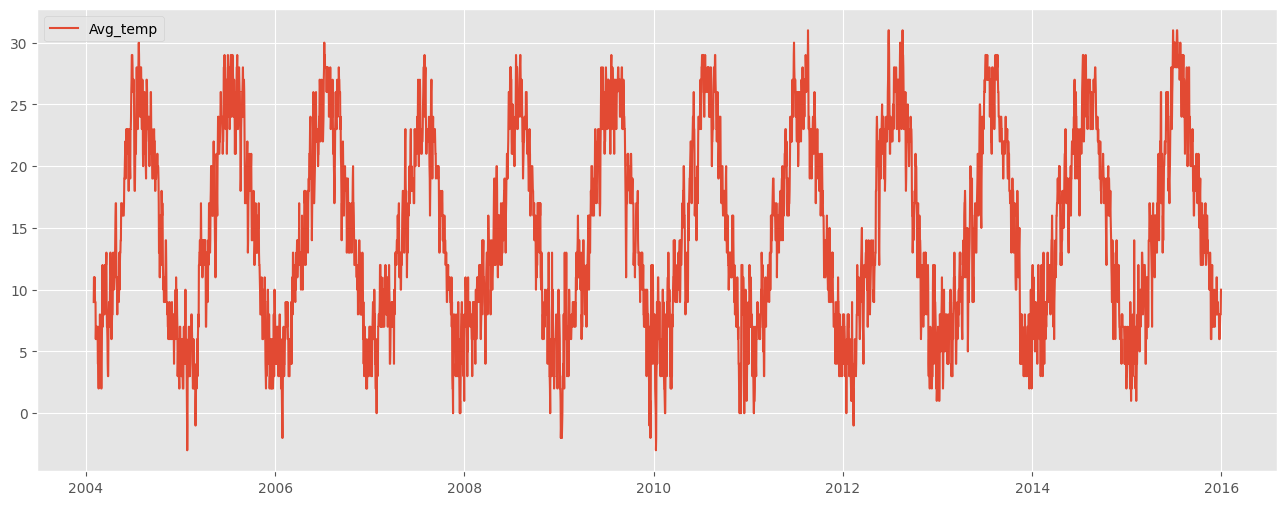

In [ ]:
plot_series({'Avg_temp': df.temperature})

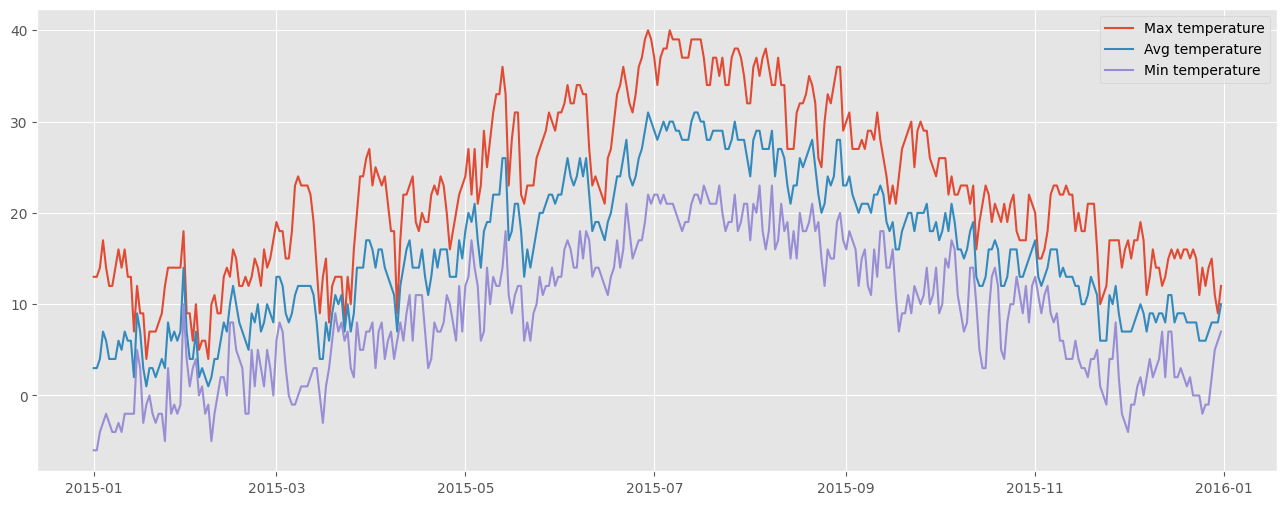

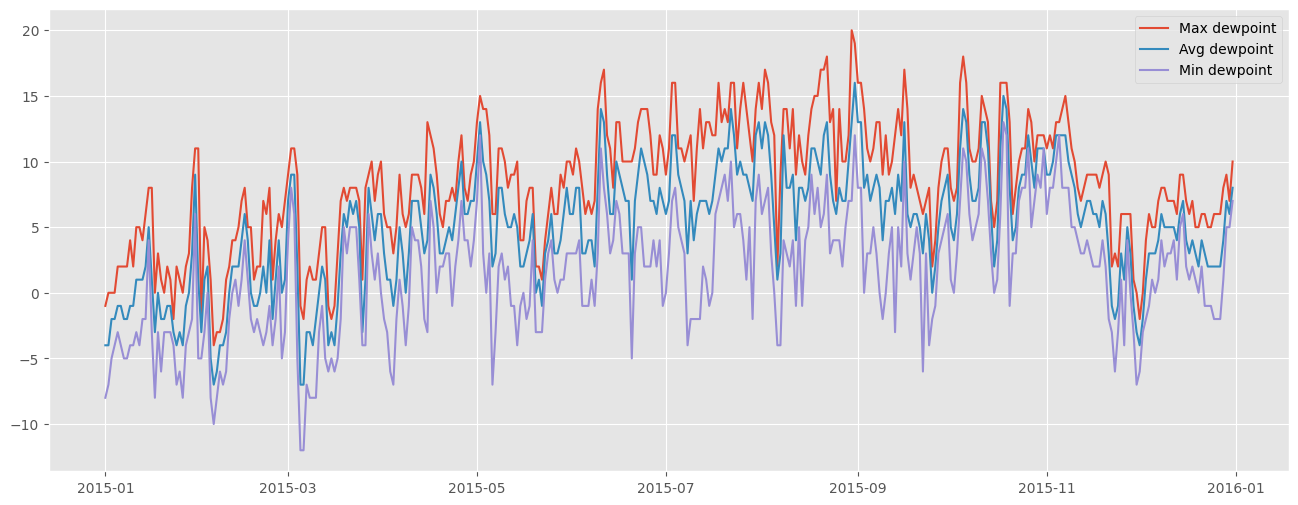

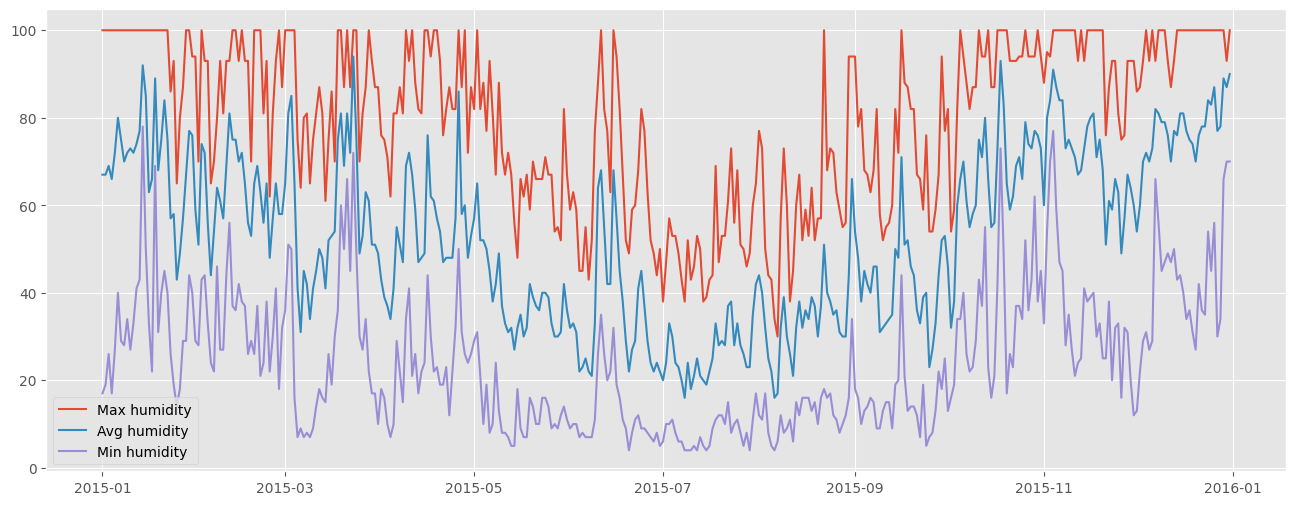

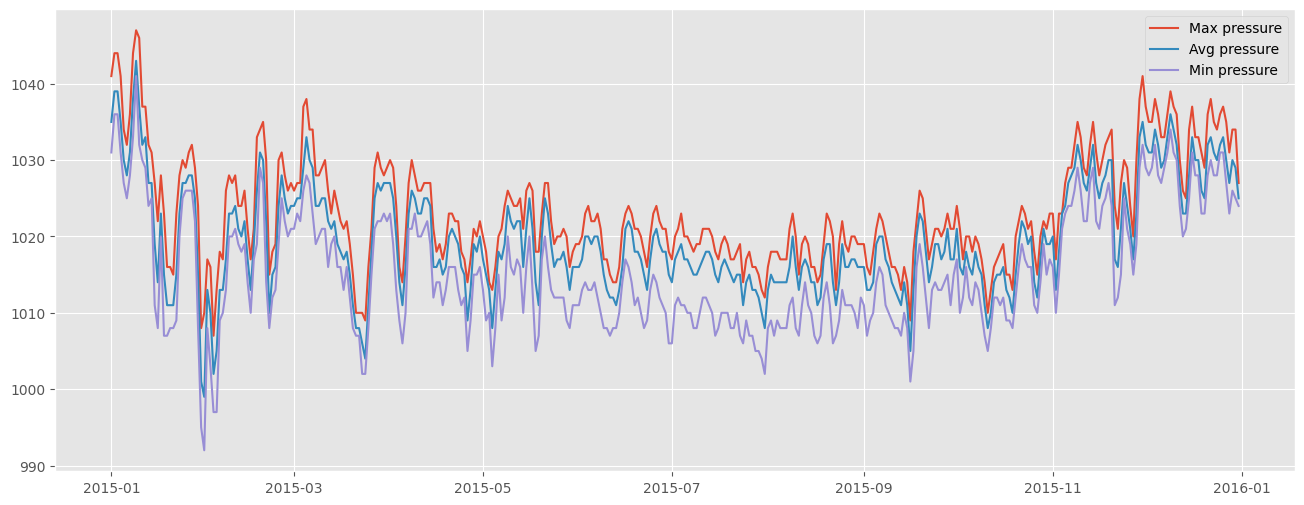

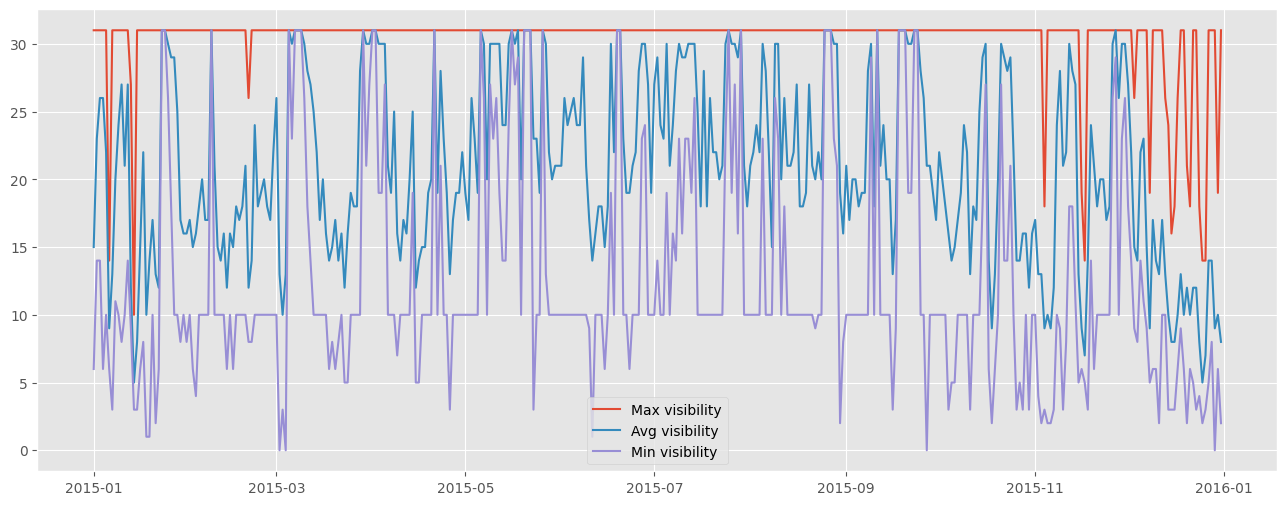

In [ ]:
for f in ['temperature', 'dewpoint', 'humidity', 'pressure', 'visibility']:
  plot_series({f'Max {f}' : df[f'{f}_max'],
               f'Avg {f}' : df[f],
               f'Min {f}' : df[f'{f}_min']},
              -365)

In [ ]:
#remove min and ma since they would introdice collinearity, with given little data
# keeping only the mean
for f in ['temperature', 'dewpoint', 'humidity', 'pressure', 'visibility']:
  df.drop([f'{f}_max', f'{f}_min'], axis=1, inplace=True)

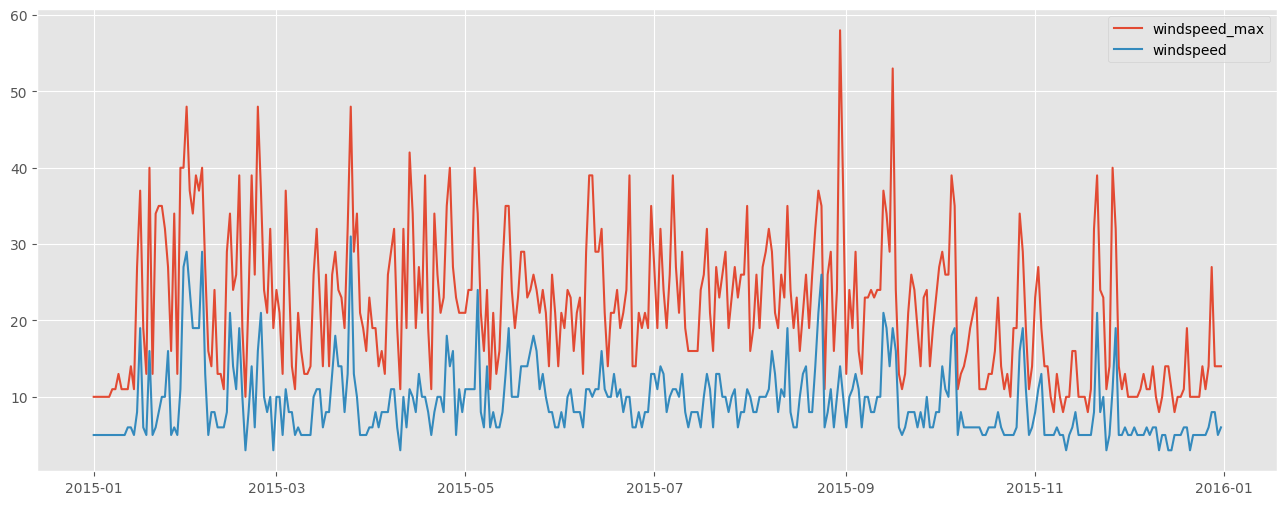

In [ ]:
plot_series({'windspeed_max': df.windspeed_max, 'windspeed':df.windspeed}, -365)

In [ ]:
 df.drop('windspeed_max', axis=1, inplace=True)

In [ ]:
df.head()

,date,temperature,dewpoint,humidity,pressure,visibility,windspeed,precipitation,rain,winddirection
2460,2004-02-01,9.0,8.0,92.0,1030,5.0,6,0.0,0,347
2461,2004-02-02,11.0,7.0,85.0,1031,10.0,5,0.0,0,353
2462,2004-02-03,10.0,5.0,79.0,1033,9.0,3,0.0,0,351
2463,2004-02-04,11.0,6.0,78.0,1035,9.0,3,0.0,0,359
2464,2004-02-05,11.0,5.0,76.0,1035,9.0,3,0.0,0,359


In [ ]:
def plot_feature(f):
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  sns.histplot(df[f], ax=axes[0], kde=True)  # Use histplot for histograms
  axes[0].set_title(f)

  sns.regplot(y='temperature', x=f, data=df, ax=axes[1], scatter_kws={'alpha':0.5})  # Use regplot for scatter plots with regression line
  axes[1].set_title(f'{f} vs temperature')

  plt.tight_layout()  # Adjust layout for better spacing
  plt.show()

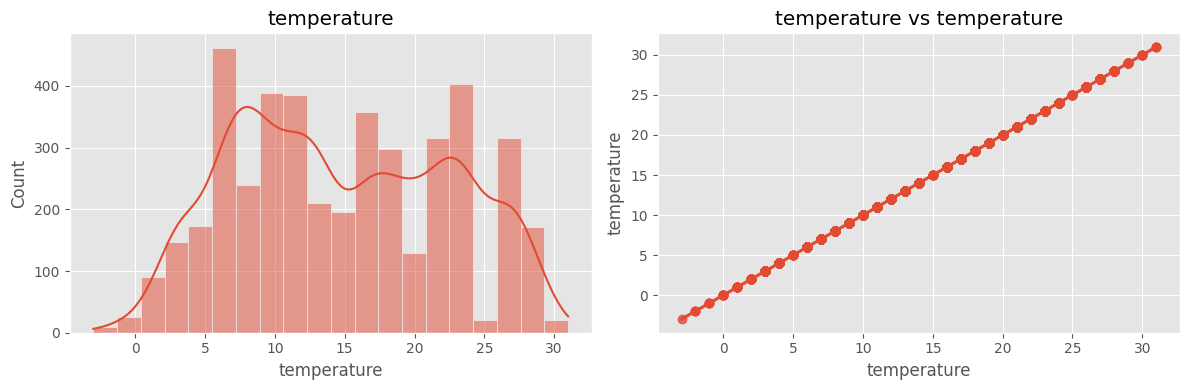

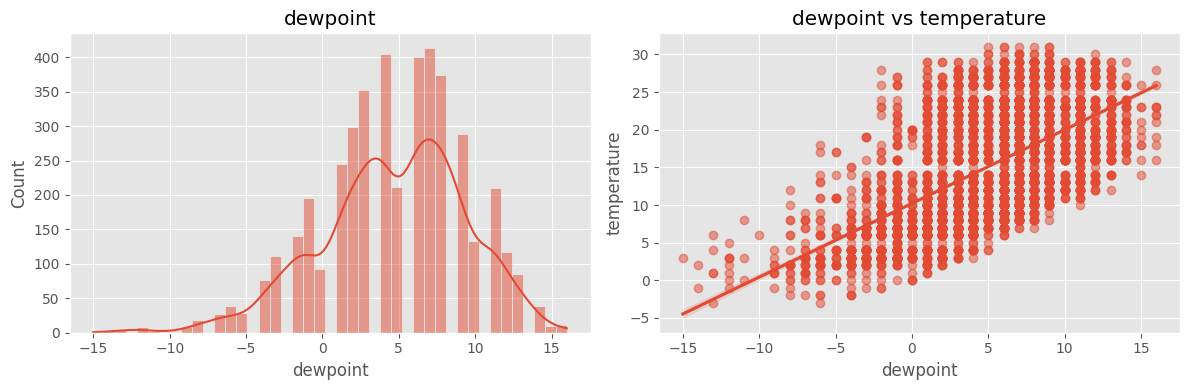

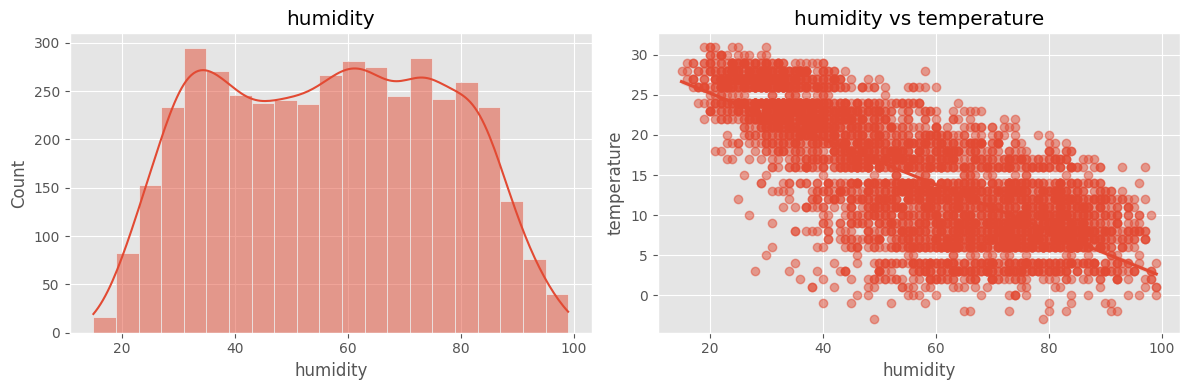

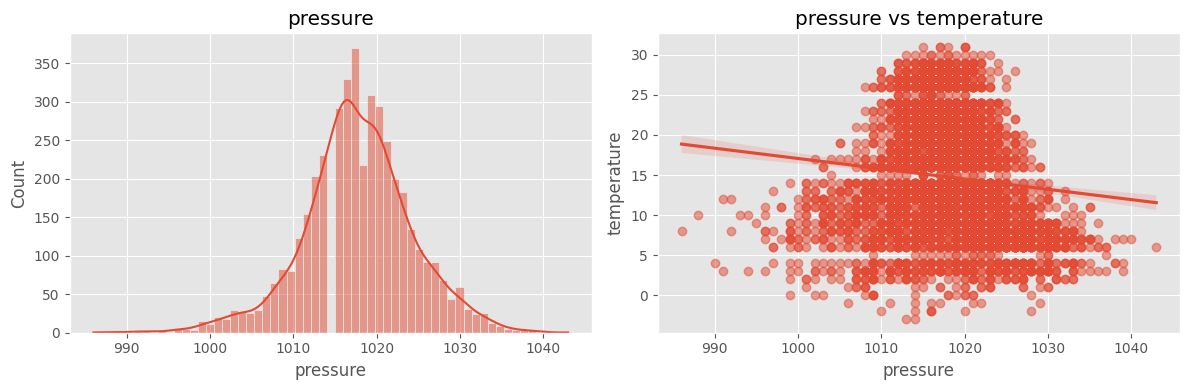

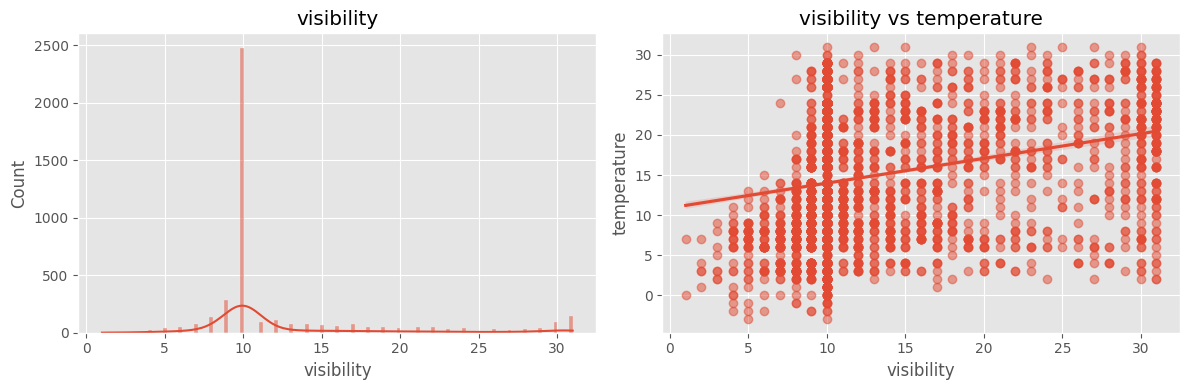

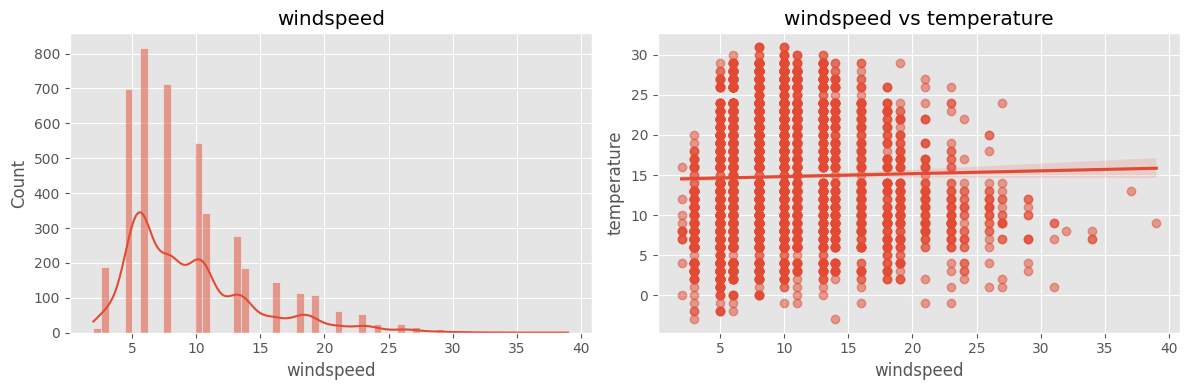

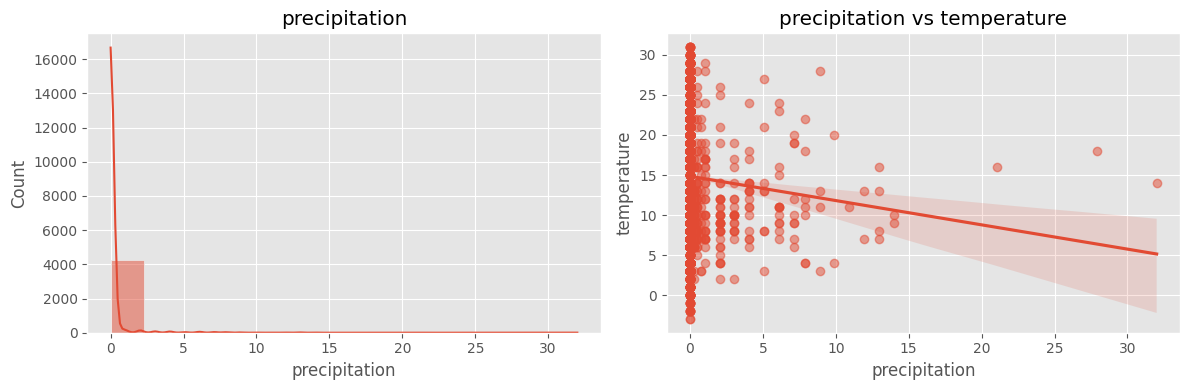

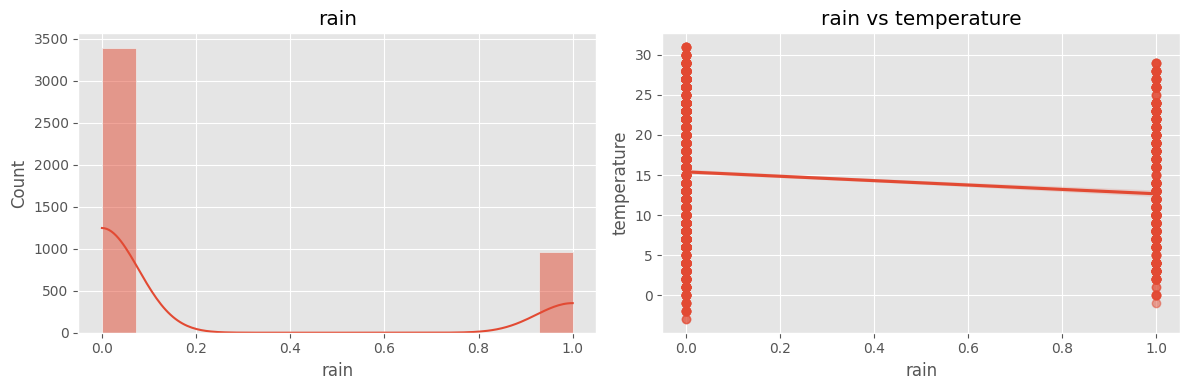

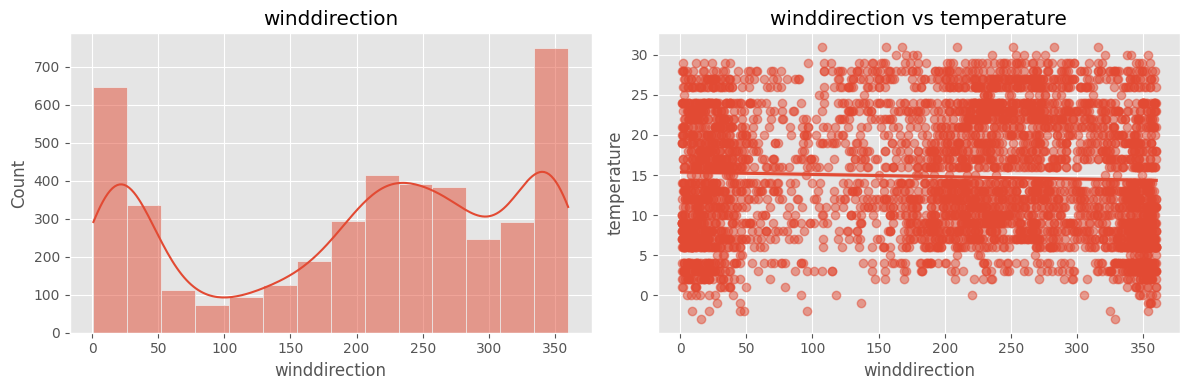

In [ ]:
for f in df.columns[1:]:
  plot_feature(f)

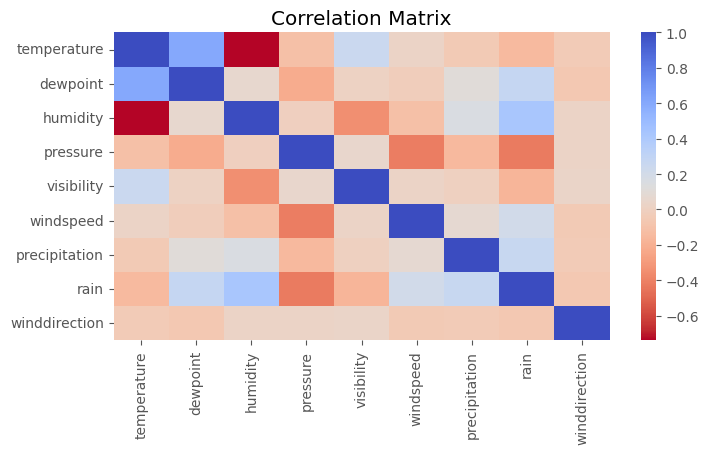

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.drop('date', axis=1).corr(), cmap='coolwarm_r')
plt.title('Correlation Matrix')
plt.show()

#Workflow:


*   Select a single target(eg temp). Do not optimize a whole vector.
*   Decide on the metric: MAE(t_true, y_hat), but not MAPE because 0 degrees
*   Copy the target variable into a separate tensor Y
*   Predictors X include the target Y. Remove the date from X
*   SPlit the timeline into non-overlapping consecutive train and test. Eg. the lat 365 days of the data
*   Leakage control: distort the last observation
*   Fit and predict 1 Horizon ahead, for both univariate and multivariate models: SARIMA and RNNs
*   explore residulas correlation, buil,d ensemble models









In [ ]:
TARGET = 'temperature'
TARGET_INDEX = list(df.columns).index(TARGET)-1 # -1 to account for the removal of the date
TEST_PERIOD = -365*3 # last days of the target
VAL_PERIOD = 90
HORIZON = 1 # forecast horizon(eg for 1 day ahead forecasts, horizon=1)
PERIOD = 365
VIEW_PERIOD = 100 # the last n days to visualize y_true, y_hat
y_hats = [] # accumulate the forecasts

In [ ]:
y = df[TARGET].values.copy()
y_true = y[TEST_PERIOD:]

x = df.drop('date', axis = 1).values.copy()
x_cols = df.drop('date', axis=1).columns

x[-1] *= 1e6

In [ ]:
def windowed_data(x,y, window_size,
                  flatten=True,
                  test_period=TEST_PERIOD,
                  val_period=VAL_PERIOD,
                  ):
  y = y[window_size:]
  x = np.array([x[s:s+window_size, :] for s in range(len(y))])
  if flatten: x = np.reshape(x, (len(y), -1))

  total_len = len(x)
  train_end = total_len + test_period + val_period  # Adjusted to avoid negative indexing
  val_end = total_len + test_period  # Adjusted to avoid negative indexing

  x_train, x_val, x_test = x[: train_end], x[train_end : val_end], x[val_end :]
  y_train, y_val = y[: train_end], y[train_end : val_end]

  # Handle empty validation set
  if len(x_val) == 0:
    # Adjust split to ensure validation set is not empty
    # For example, you can take a small portion from the training set
    val_size = min(int(0.1 * len(x_train)), val_period)  # 10% or val_period, whichever is smaller
    x_val = x_train[-val_size:]
    y_val = y_train[-val_size:]
    x_train = x_train[:-val_size]
    y_train = y_train[:-val_size]

  return x_train, x_val, x_test, y_train, y_val


In [ ]:
reports = pd.DataFrame(columns=['target', 'horizon', 'forecast', 'MAE'])
reports

,target,horizon,forecast,MAE


1. Naive forecast method S(t)=S(t-1)

In [ ]:
def naive_forecast(series, test_period=TEST_PERIOD, horizon=HORIZON):
  return series[test_period-horizon : -horizon]

y_hat = naive_forecast(y)
y_hats.append(y_hat) # used to store predictions from different forecasting methods for comparison
y_hat[-5:] #leakage control

array([6., 7., 8., 8., 8.])

In [ ]:
model_name = 'Naive S(t) = S(t-1)'
reports.loc[len(reports)] = [TARGET, HORIZON, model_name, MAE(y_true, y_hat)]
reports

,target,horizon,forecast,MAE
0,temperature,1,Naive S(t) = S(t-1),1.488584


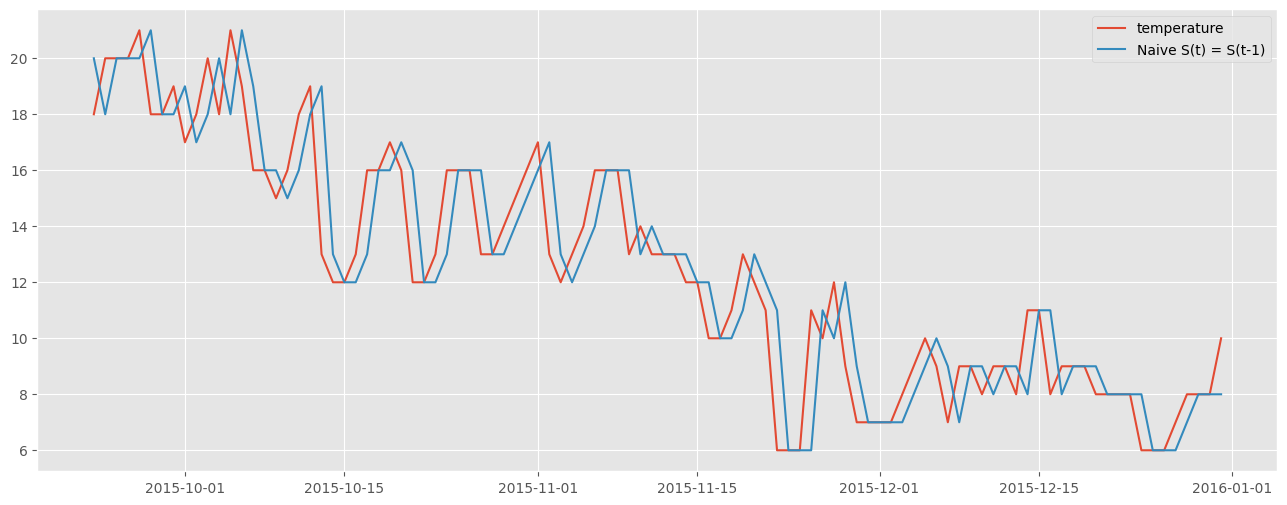

In [ ]:
plot_series({f'{TARGET}' : y_true, model_name:y_hat}, -VIEW_PERIOD)

In [ ]:
# check naive forecast error for n-day ahead horizons
for h in [1,2,7,30]:
  print(f'{h} {MAE(y_true, naive_forecast(y, horizon=h)):.4f}')

1 1.4886
2 2.0548
7 2.9014
30 4.3297


2. Moving Average Method : a slightly less naive approach, applicable only for periodic series, relies on smoothing the signal as compared to previous periods:  **S(t) = MAE[S(t-1)-S(t-1-period)] + S(t-period)**

In [ ]:
def ma_trailing(series, window):
  """ Produce a trailing moving average over a fixed period length(window)
  The trailing MA does not include the last observation to prevent leakage """

  series, window = np.array(series), int(window)
  moving_averages = []   # Initialize an empty list to store the moving averages
  # Iterate through the series, starting from the window size
  for t in range(window, len(series)):
    window_data = series[t-window:t]    # Get the current window of data
    window_average = np.nanmean(window_data)   # Calculate the average of the window, ignoring NaNs
    moving_averages.append(window_average)      # Append the average to the list

  return np.array(moving_averages)
  # is used to calculate the mean, ignoring any missing values (NaN) in the window.
  # series[t-window:t] selects the data points within the current window.
  # The loop iterates through the series from the window size to the end, ensuring that there are enough previous data points to calculate the average.
  #


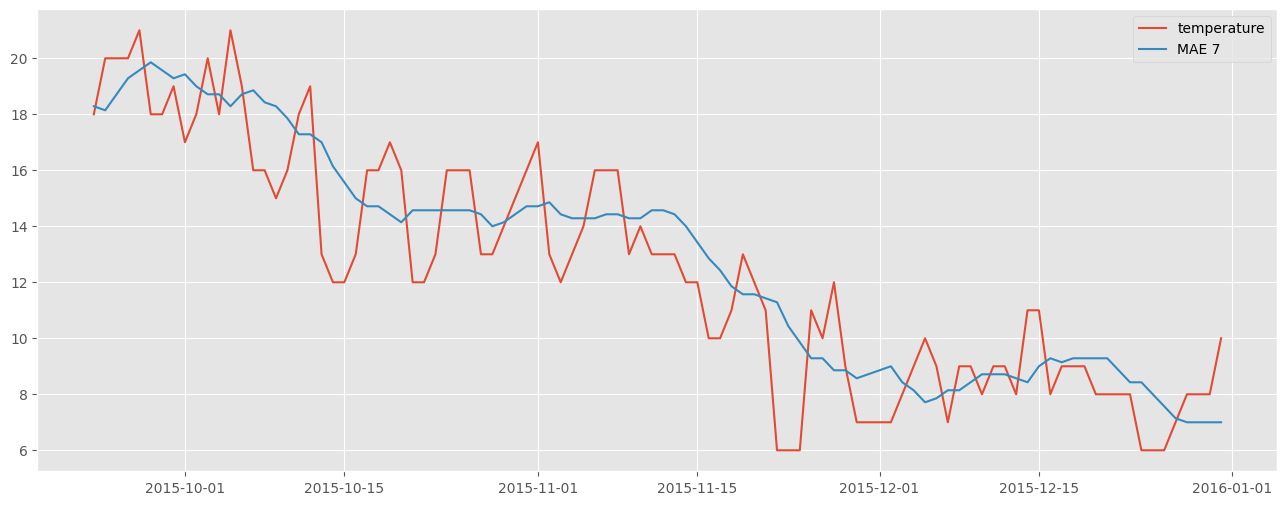

In [ ]:
window = 7
plot_series({f'{TARGET}' : y_true, f'MAE {window}' : ma_trailing(y, window)}, -VIEW_PERIOD)

In [ ]:
for w in [1,2,7,30]:
  print(w, MAE(y_true, ma_trailing(y,w)[-len(y_true):]))

1 1.4885844748858448
2 1.6703196347031963
7 2.051011089367254
30 2.6691019786910197


In [ ]:
def diff_forecast(series, ma_window, period=365, split_time=TEST_PERIOD):
  """ Implements period-based differencing:
      S_hat(t) = S(t-period) = MA_ma_window [S(t)-S(t-period)] <-- no leakage from S(t) !
      NB: works well for strictly periodic series such as 24 hours or 365 days """
  diff_series = (series[period:]-series[:-period]) # St - St-period
  return series[split_time-period:-period] + ma_trailing(diff_series, ma_window)[split_time:]

  """
- This is where the actual forecast is made:
- `series[split_time-period:-period]`: This term selects the values from the previous period
   corresponding to the time points in the test set. It provides the baseline forecast
   based on the previous cycle.
- `ma_trailing(diff_series, ma_window)[split_time:]`: This term selects the moving average
   of the differences calculated earlier, but only for the test set period. This represents the
   adjustment to the baseline forecast based on the recent trend.
- Finally, the two terms are added together to produce the final forecast. """

In [ ]:
for w  in range(1,10):
  print(w, MAE(y_true, diff_forecast(y,w)))

1 2.149771689497717
2 2.367579908675799
3 2.533637747336378
4 2.624200913242009
5 2.708675799086758
6 2.7899543378995433
7 2.8331376386170906
8 2.8746575342465754
9 2.906950786402841


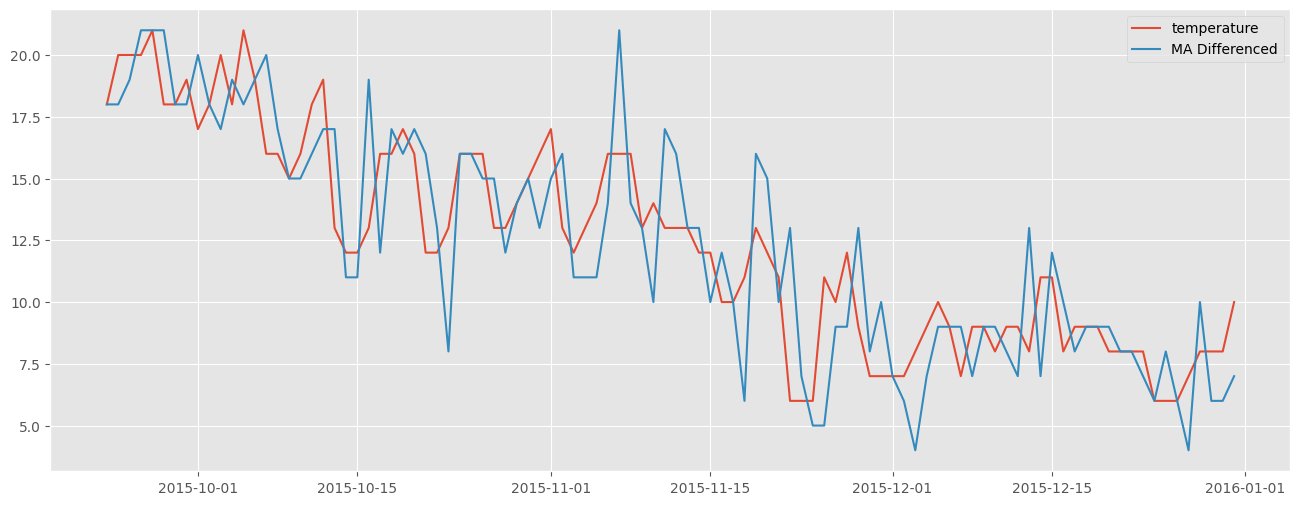

In [ ]:
plot_series({f'{TARGET}': y_true, 'MA Differenced': diff_forecast(y, 1)}, -VIEW_PERIOD)

Linear Regression

In [ ]:
from sklearn.linear_model import Ridge # import Ridge from sklearn.linear_model


In [ ]:
for param in range(1, 15):
  x_train, x_val, x_test, y_train, y_val = windowed_data(x, y, window_size=param)
  model= Ridge(alpha=1000)
  model.fit(x_train, y_train)
  y_val_hat = model.predict(x_val)
  print(param, f'{MAE(y_val, y_val_hat):.4f}', f'{model.score(x_val, y_val):.4f}')


1 1.6508 0.4270
2 1.6541 0.4244
3 1.6868 0.3919
4 1.7138 0.4010
5 1.7170 0.3916
6 1.7512 0.3832
7 1.7295 0.3963
8 1.7381 0.3919
9 1.7569 0.3868
10 1.7836 0.3736
11 1.7848 0.3744
12 1.7823 0.3757
13 1.8052 0.3621
14 1.7769 0.3713


In [ ]:
WINDOW_SIZE=7

In [ ]:
x_train, x_val, x_test, y_train, y_val = windowed_data(x,y,window_size=WINDOW_SIZE)
model = Ridge(alpha=1000)
model.fit(x_train, y_train)

Ridge(alpha=1000)

In [ ]:
y_hat = model.predict(x_test)
y_hats.append(y_hat)
y_hat[-5:]

array([5.76092375, 6.14791269, 7.45826758, 7.74205199, 7.49139104])

In [ ]:
model_name = 'Ridge regression alpha=1000'
reports.loc[len(reports)] = [TARGET, HORIZON, model_name, MAE(y_true, y_hat)]
reports

,target,horizon,forecast,MAE
0,temperature,1,Naive S(t) = S(t-1),1.488584
1,temperature,1,Ridge regression alpha=1000,1.424586


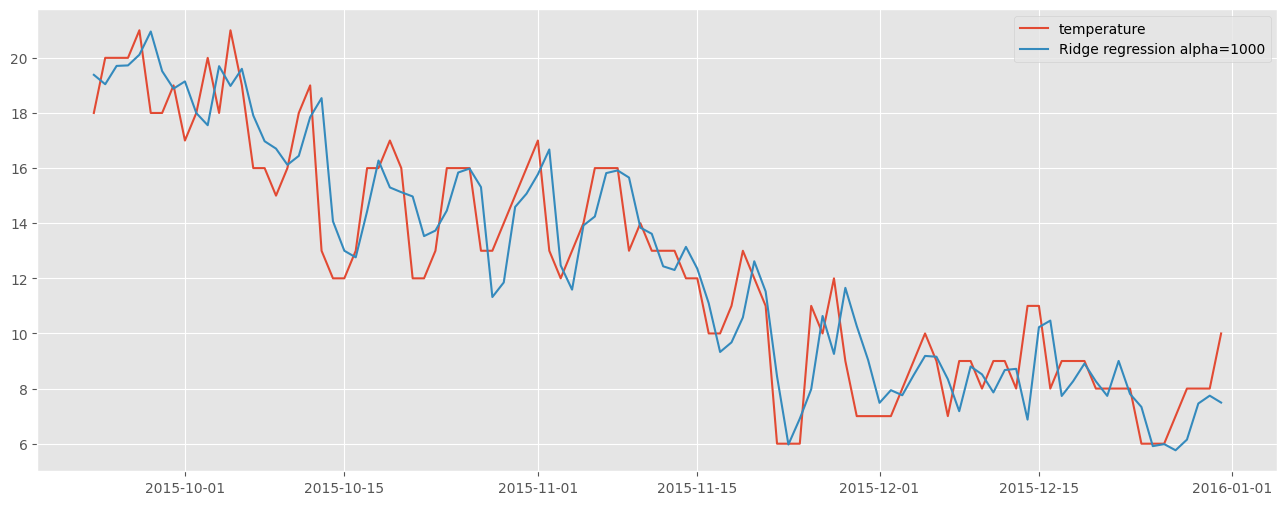

In [ ]:
plot_series({f'{TARGET}' : y_true, model_name:y_hat}, -VIEW_PERIOD)

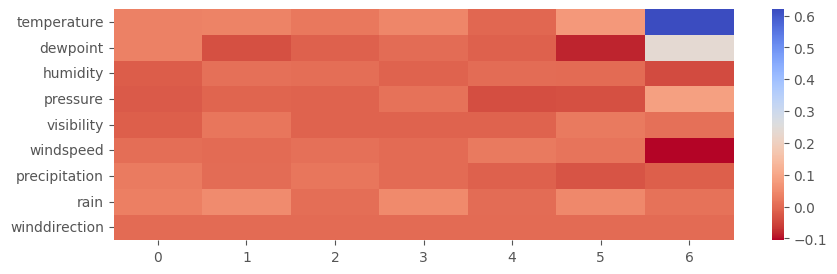

In [ ]:
fi = np.reshape(model.coef_, (WINDOW_SIZE, -1))
fi = pd.DataFrame(columns=x_cols, data=fi)

plt.figure(figsize=(10, 3))
sns.heatmap(fi.T, cmap='coolwarm_r')
plt.show()

In [ ]:
fi.apply(sum, axis=0)

,0
temperature,0.823551
dewpoint,0.125307
humidity,-0.058300
pressure,-0.017804
visibility,0.001211
windspeed,-0.050895
precipitation,-0.015373
rain,0.198221
winddirection,-0.001276


ARIMA

In [ ]:
def plot_pacf_acf(arr, max_lags):
  _, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,4))
  plot_pacf(arr, lags=max_lags, ax=ax0)
  plot_acf(arr, lags= max_lags, ax=ax1)
  plt.show()

def differences(series, period):
  return series[period:] - series[:-period]

def plot_normal_qq(arr, title):
  _, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 5))
  lim = max(np.abs(arr))
  limrange = np.arange(-lim, lim, lim/1000)
  sns.distplot(arr, bins=min(20, len(np.unique(arr))), color='k', kde=False, norm_hist=True, ax=ax0, label='Actual')
  ax0.plot(limrange, stats.norm.pdf(limrange, np.nanmean(arr), np.nanstd(arr)), 'r', lw=1, label='Normal')
  ax0.set_title(f'{title}: mean={np.nanmean(arr):.2f} std={np.nanstd(arr):.2f}')
  ax0.set_xlim(-lim, lim)
  ax0.legend()
  qqplot(arr, line='q', fit=True, color='k', marker='.', ax=ax1)
  ax1.set_title(f'{title}:Q-Q plot')
  plt.show()



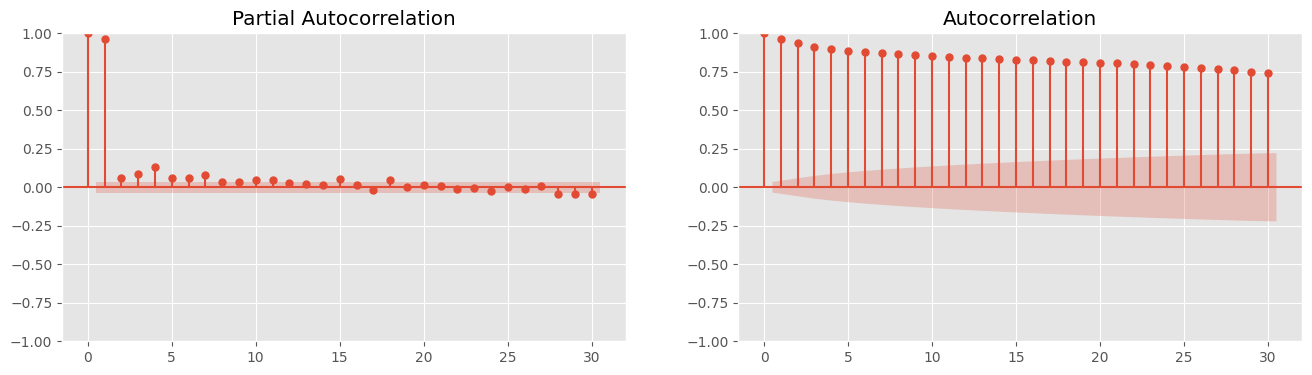

In [ ]:
plot_pacf_acf(y_train, 30)

In [ ]:
d_train = differences(y_train, 1)
# the distribution of the difference is leptokurtic ie not white noise
print(np.nanmean(d_train))
print(np.nanstd(d_train))
print(stats.skew(d_train))
print(stats.kurtosis(d_train))

-0.0021545090797168358
2.0208961408740387
0.021956337845122128
0.6141493956900415


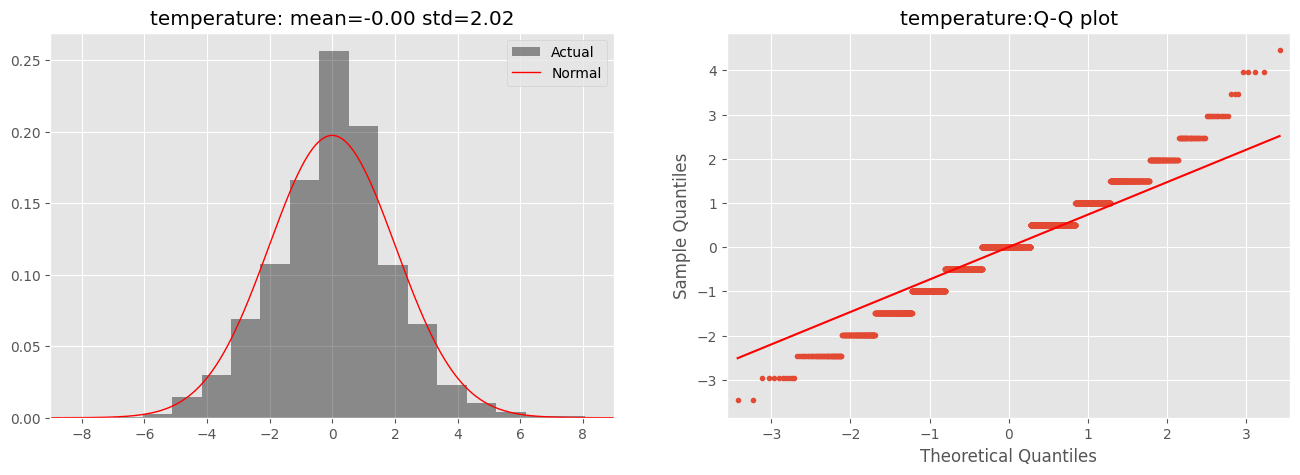

In [ ]:
plot_normal_qq(d_train, title=TARGET)

In [ ]:
#ARIMA grid search of p,d,q
orders=[(1,1,0),
        (1,1,1),
        (2,1,0),
        (2,1,1),
        (7,1,0),
        (7,1,1)]

In [ ]:
def arimax_forecast(x,y, x_forecast, y_forecast, order):
  model = ARIMA(y[1:TEST_PERIOD], order=order, exog=x[:TEST_PERIOD-1])
  results = model.fit()
  extended_results = results.extend(endog=y_forecast, exog=x_forecast)
  return extended_results.forecasts[0]

In [ ]:
for order in orders:
  y_val, y_hat = arimax_forecast(
                            x,
                            y,
                            x_forecast=x[TEST_PERIOD+VAL_PERIOD-1:VAL_PERIOD-1],
                            y_forecast=y[TEST_PERIOD+VAL_PERIOD:VAL_PERIOD],
                            order=order)
  mae = MAE(y[TEST_PERIOD+VAL_PERIOD:VAL_PERIOD], y_val_hat)
  print(order, '\t', f'{mae:.4f}')

ValueError: Prediction must have `end` after `start`.